In [1]:
!pip install pandas_datareader
!pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter
!pip install PyPortfolioOpt
#Installing the Portfolio Optimzation Library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from matplotlib.ticker import FuncFormatter

In [7]:
import yfinance as yf
#data = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')
tickers = ['GOOGL','IBM','AAPL','NFLX','AMZN']
thelen = len(tickers)
price_data = []
for ticker in range(thelen):
   prices = yf.download(tickers[ticker], start='2018-06-20', end = '2020-06-20')
   #prices = web.DataReader(tickers[ticker], start='2018-06-20', end = '2020-06-20', data_source='yahoo')
   price_data.append(prices[['Adj Close']])
df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers
df_stocks.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GOOGL,IBM,AAPL,NFLX,AMZN
Date,,,,,
2020-06-15,71.037003,100.035530,84.187027,425.500000,128.634003
2020-06-16,72.323502,102.913673,86.418190,436.130005,130.763504
2020-06-17,72.626999,102.091331,86.297913,447.769989,132.048996
2020-06-18,71.706001,102.099564,86.332283,449.869995,132.699005
2020-06-19,71.232002,100.709839,85.838905,453.720001,133.750504


In [8]:
df_stocks.shape

(504, 5)

In [25]:
#Annualized Return
mu = expected_returns.mean_historical_return(df_stocks)
print(mu)
#Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks)
print(Sigma)
#Max Sharpe Ratio - Tangent to the EF
from pypfopt import objective_functions, base_optimizer
ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
sharpe_pfolio=ef.max_sharpe() 
#May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt=ef.clean_weights()
print("we will calculated the portfolio weights of each asset.")
print(sharpe_pwt)

GOOGL    0.097094
IBM     -0.028848
AAPL     0.388867
NFLX     0.043488
AMZN     0.236850
dtype: float64
          GOOGL       IBM      AAPL      NFLX      AMZN
GOOGL  0.102003  0.065786  0.087485  0.078408  0.075851
IBM    0.065786  0.104667  0.074639  0.051069  0.057401
AAPL   0.087485  0.074639  0.129428  0.082343  0.081123
NFLX   0.078408  0.051069  0.082343  0.180431  0.096528
AMZN   0.075851  0.057401  0.081123  0.096528  0.111457
we will calculated the portfolio weights of each asset.
OrderedDict([('GOOGL', 0.0), ('IBM', 0.0), ('AAPL', 1.0), ('NFLX', 0.0), ('AMZN', 0.0)])


In [10]:
#VaR Calculation
ticker_rx2 = []
#Convert Dictionary to list of asset weights from Max Sharpe Ratio Portfolio
sh_wt = list(sharpe_pwt.values())
sh_wt=np.array(sh_wt)

In [11]:
#convert the stock prices of the portfolio to a cumulative return
for a in range(thelen):
  ticker_rx = df_stocks[[tickers[a]]].pct_change()
  ticker_rx = (ticker_rx+1).cumprod()
  ticker_rx2.append(ticker_rx[[tickers[a]]])
ticker_final = pd.concat(ticker_rx2,axis=1)
ticker_final

,GOOGL,IBM,AAPL,NFLX,AMZN
Date,,,,,
2018-06-20,NaN,NaN,NaN,NaN,NaN
2018-06-21,0.987644,0.990325,0.994424,0.996833,0.988652
2018-06-22,0.987518,0.990535,0.991528,0.986395,0.980338
2018-06-25,0.962173,0.973077,0.976783,0.922545,0.950328
2018-06-26,0.956548,0.975111,0.988901,0.958321,0.966293
...,...,...,...,...,...
2020-06-15,1.199878,0.936931,1.889365,1.020971,1.470036
2020-06-16,1.221609,0.963887,1.939438,1.046478,1.494372
2020-06-17,1.226735,0.956185,1.936739,1.074407,1.509062


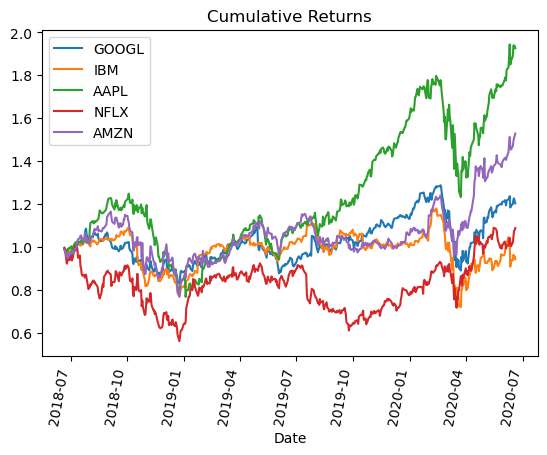

In [12]:
#Plot graph of Cumulative/HPR of all stocks
for i, col in enumerate(ticker_final.columns):
  ticker_final[col].plot()
plt.title('Cumulative Returns')
plt.xticks(rotation=80)
plt.legend(ticker_final.columns)
#Saving the graph into a JPG file
plt.savefig('CR.png', bbox_inches='tight')

In [ ]:
# Porfolio expected return - https://www.indeed.com/career-advice/career-development/expected-return#:~:text=Expected%20return%20%3D%20(Return%20A%20x,for%20the%20investment's%20historical%20performance.


In [13]:
#Taking Latest Values of Return
pret = []
pre1 = []
price =[]
for x in range(thelen):
  pret.append(ticker_final.iloc[[-1],[x]])
  price.append((df_stocks.iloc[[-1],[x]]))
pre1 = pd.concat(pret,axis=1)
pre1 = np.array(pre1)
price = pd.concat(price,axis=1)
varsigma = pre1.std()
ex_rtn=pre1.dot(sh_wt)
print('The weighted expected portfolio return for selected time period is'+ str(ex_rtn))
#ex_rtn = (ex_rtn)**0.5-(1) #Annualizing the cumulative return (will not affect outcome)
price=price.dot(sh_wt) #Calculating weighted value
print(ex_rtn, varsigma,price)

The weighted expected portfolio return for selected time period is[1.92643767]
[1.92643767] 0.35177250179064495 Date
2020-06-19    85.838905
dtype: float64


In [14]:
#Monta carlo

In [ ]:
from scipy.stats import norm
import math
Time=1440 #No of days(steps or trading days in this case)
lt_price=[]
final_res=[]
for i in range(10000): #10000 runs of simulation
  daily_return=                     (np.random.normal(ex_rtn/Time,varsigma/math.sqrt(Time),Time))
  plt.plot(daily_returns)
plt.axhline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=1)
plt.axhline(np.percentile(daily_returns,95), color='g', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(daily_returns), color='b', linestyle='solid', linewidth=1)
plt.show()

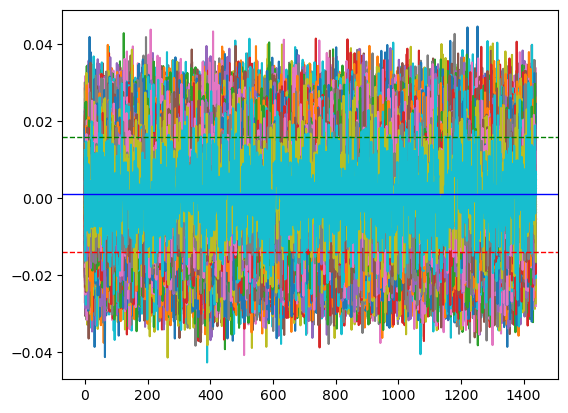

In [20]:
from scipy.stats import norm
import math
Time=1440 #No of days(steps or trading days in this case)
lt_price=[]
final_res=[]
for i in range(1000): #10000 runs of simulation
    daily_returns=(np.random.normal(ex_rtn/Time,varsigma/math.sqrt(Time),Time))
    plt.plot(daily_returns)
plt.axhline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=1)
plt.axhline(np.percentile(daily_returns,95), color='g', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(daily_returns), color='b', linestyle='solid', linewidth=1)
plt.show()

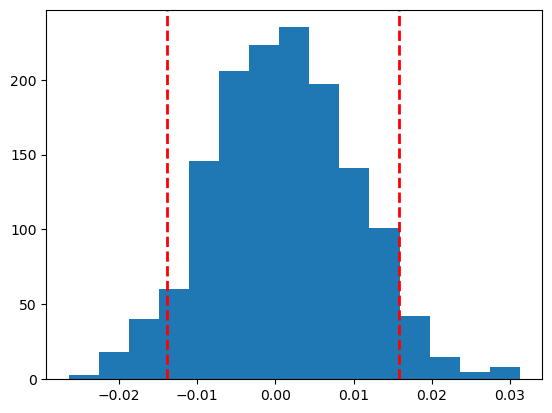

In [21]:
plt.hist(daily_returns,bins=15)
plt.axvline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(daily_returns,95), color='r', linestyle='dashed', linewidth=2)
plt.show()


In [22]:
print(np.percentile(daily_returns,5),np.percentile(daily_returns,95)) #VaR - Minimum loss of 5.7% at a 5% probability, also a gain can be higher than 15% with a 5 % probability
pvalue = 1000 #portfolio value
print('$Amount required to cover minimum losses for one day is ' + str(pvalue* - np.percentile(daily_returns,5)))


-0.013837141664861507 0.01583766851727256
$Amount required to cover minimum losses for one day is 13.837141664861507
